### Imports

In [1]:

import networkx as nx
import numpy as np
import random, math
import graphviz
import functools, collections, operator

import time

import kaleido

import pandas as pd


import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm

import plotly.graph_objects as go
from pyvis.network import Network
from networkx.drawing.nx_agraph import graphviz_layout
import plotly.express as px


# import models
from classes.jackson_model import JacksonSimulationV2
from classes.network_drawing import plotly_sim_drawing


In [3]:

# parameter selection
test_sim = JacksonSimulationV2(0, 250, 10, 0.25, 10, 0.25, 0.5, biased=True, rho=3)

#plotly_sim_drawing.plotly_draw(plotly_sim_drawing(), test_sim, layout='spring', draw_largest_CC=True, title=f'Network after {250} iterations, rho={3}')



[] []
[1] []
[1 2] []
[1 3 2] []
[1 4 2 3] []
[2 4 3 5 1] []
[6 2 4 3 5 1] []
[7 3 5 2 4 1 6] []
[6 5 1 4 3 8 7 2] [8. 5.]
[2 1 9 6 3 4 7 5 8] [7. 8. 9. 4. 5.]
[ 1  8 10  6  7  5  3  4  9  2] [ 5. 10.  7.  9.  4.  8.  1.]
[10  2  3 11  4  8  5  1  6  7] [ 9.  1. 11.  5.  7. 10.  8.]
[ 4  7  3  6 11 10  8  2  5  1] [ 7. 11.  1. 12. 10.  9.  5.  8.]
[13 11  3  1  4  9 10  6  8 12] [ 5. 10.  9.  1.  3.  4. 12.  7. 11. 13.]
[ 5 10 13  7  1  8  6  9 14  2] [ 9.  7. 10. 14. 13.  3. 11.  8.  4.  5.]
[15  4 11  9  3  8  7  5 10 14] [ 3. 13.  6.  7.  4. 11. 12. 15. 14.  8.]
[ 4  5 14  8 10  7  3 15 16  9] [12.  9. 15. 11.  4. 13.  3. 14.  1.  6.]
[13 16  7 17 10  8  9  5  2  3] [ 6.  7. 14.  1.  4. 16. 13.  9.  5. 17.]
[ 7 10  3  2 18  4  9  6  5 16] [ 6. 15.  7.  1. 13. 16.  3. 11.  4. 18.]
[ 1 15 14  5  3 19  7  2  4 12] [ 6. 12. 15. 11.  9.  4. 16. 13.  3.  8.]
[10 19  4  7 16 17 13  5  9 18] [18  7  8  3  6  1 17 11 20 15]
[16 20 18  7 14 19  2 13 15 11] [15.  6. 18. 11.  3.  1. 13.  4. 12.

# Testing overall characteristics

## General social network characteristics

Need to test: 

* Short APL (order of log(n))
* Larger clustering coefs than random
* Fat degree tails
* Positive assortativity
* Negative clustering-neighbour-degree correlation




In [26]:

n_sims = 100


val_dict = {'APL': [], 'Clustering': [], 'Assortativity': [], 'Degree-neighbour-clustering': [], 'Degree-list': []}

for i in range(n_sims):
    sim = JacksonSimulationV2(5, 1000, 5, 1, 5, 1, 0.5, True, 1)
    graph = sim.graph_history[-1]
    return_dict = sim.helper_functions().graph_social_network_chars(graph, summarise=True)

    for key in list(val_dict.keys()):
        val_dict[key].append(return_dict[key])


degree_list = list(np.concatenate(val_dict['Degree-list']))
del val_dict['Degree-list']

val_df = pd.DataFrame(val_dict)


Seems to work alright: positive CND correlation probably driven by relativley low clustering overall, consistent with their findings for small number of nodes.

In [31]:
px.histogram(degree_list, log_y=True, nbins=100)

array([[<AxesSubplot:title={'center':'APL'}>,
        <AxesSubplot:title={'center':'Clustering'}>],
       [<AxesSubplot:title={'center':'Assortativity'}>,
        <AxesSubplot:title={'center':'Degree-neighbour-clustering'}>]],
      dtype=object)

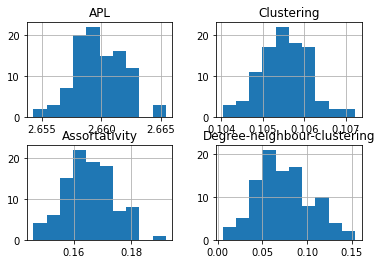

In [30]:

val_df.hist()


## Stuff to do with SES

### Rho effect on HSES assortativity

In [260]:

# initial nodes and time
initial_n = 0
T = 100

p = 0.25

# parent nodes and prob
m = 4
pm_o = p

# parent neighbours and prob
n = 16
pn_o = p

rho = 3

# p high SES
p_SES_high = 0.5

rho_list = np.arange(0.25, 5, 0.05)
rho_list = [rho_val for rho_val in rho_list]
test_sims = [JacksonSimulationV2(initial_n, T, m, pm_o, n, pn_o, p_SES_high, biased=True, rho=rho_val) for rho_val in rho_list]


SES_assortativity_list = [nx.assortativity.attribute_assortativity_coefficient(sim.graph_history[-1], 'SES_High') for sim in test_sims]


#plt.plot(rho_list, SES_assortativity_list)






In [279]:

df_rho_SES_ass = pd.DataFrame(np.transpose([rho_list, SES_assortativity_list]), columns=['Rho', 'SES Assortativity'])

rho_ass = px.line(df_rho_SES_ass, x='Rho', y='SES Assortativity')

rho_ass.update_layout(
    title = None, 
    font=dict(size = 18),
    xaxis_title = 'Rho', 
    yaxis_title = 'SES Assortativity',
    width = 500, height = 500,
    showlegend = True, 
    legend=dict(x=0.75,y=1),
    legend_title_text = '',
    xaxis_range = [0,5],
    yaxis_range = [-1,1],
    margin=dict(b=5,l=5,r=5,t=5),
    xaxis = dict(showgrid = False, showline = True, linecolor = 'rgb(0,0,0)', linewidth = 2), 
    yaxis = dict(showgrid = False, showline = True, linecolor = 'rgb(0,0,0)', linewidth = 2),
    plot_bgcolor='rgba(0,0,0,0)')

rho_ass.data[0].line.color = "rgb(250, 20, 250)"
rho_ass.add_hline(y=0, line_width=1, annotation_text = 'Equal share')
rho_ass.add_vline(x=1, line_width=1, annotation_text = 'rho=1: no bias')


### Rho effect on share HSES

In [282]:

# initial nodes and time
initial_n = 0
T = 100

p = 0.25

# parent nodes and prob
m = 4
pm_o = p

# parent neighbours and prob
n = 16
pn_o = p

rho = 3

# p high SES
p_SES_high = 0.5

# run several simulations
rho_list = np.arange(0.25, 5, 0.05)
n_per_rho = 10

test_sims = [[JacksonSimulationV2(initial_n, T, m, pm_o, n, pn_o, p_SES_high, biased=True, rho=rho_val) for i in range(n_per_rho)] for rho_val in rho_list]





In [283]:

# 
H_shares = [np.transpose([new_sim.helper_functions().average_neighbour_type_per_SES(test_sims[i][j].graph_history[-1]) for j in range(n_per_rho)]) for i in range(len(rho_list))]
avg_H_shares = np.transpose(np.average(H_shares, axis=2))
df_avg_H_shares = pd.DataFrame(np.transpose(avg_H_shares), columns=['High SES', 'Low SES'])
df_avg_H_shares['Rho_val'] = rho_list

rho_lines = px.line(df_avg_H_shares, x='Rho_val', y=['High SES', 'Low SES'])

rho_lines.update_layout(
    title = None, 
    font=dict(size = 18),
    xaxis_title = 'Rho', 
    yaxis_title = 'Share of HSES friends',
    width = 500, height = 500,
    showlegend = True, 
    legend=dict(x=0.75,y=1),
    legend_title_text = '',
    xaxis_range = [0.025,5],
    yaxis_range = [0,1],
    margin=dict(b=5,l=5,r=5,t=5),
    xaxis = dict(showgrid = False, showline = True, linecolor = 'rgb(0,0,0)', linewidth = 2), 
    yaxis = dict(showgrid = False, showline = True, linecolor = 'rgb(0,0,0)', linewidth = 2),
    plot_bgcolor='rgba(0,0,0,0)')

rho_lines.data[0].line.color = "rgb(200, 20, 0)"
rho_lines.data[1].line.color = "rgb(0, 20, 200)"
rho_lines.add_hline(y=0.5, line_width=1, annotation_text = 'Equal share')
rho_lines.add_vline(x=1, line_width=1, annotation_text = 'rho=1: no bias')

rho_lines



### Varying p

Varying p

c:\Programming\Python\lib\site-packages\networkx\algorithms\assortativity\correlation.py:278: RuntimeWarning:

invalid value encountered in double_scalars



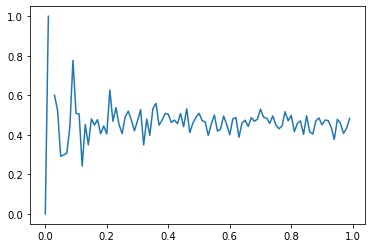

In [152]:

# initial nodes and time
initial_n = 0
T = 100

p = 0.25

# parent nodes and prob
m = 4
pm_o = p

# parent neighbours and prob
n = 16
pn_o = p

rho = 3

# p high SES
p_SES_high = 0.5

p_list = np.arange(0, 1, 0.01)
test_sims = [JacksonSimulationV2(initial_n, T, m, pm_o=p, n=n, pn_o=p, p_SES_high=p_SES_high, biased=True, rho=3) for p in p_list]


SES_assortativity_list = [nx.assortativity.attribute_assortativity_coefficient(sim.graph_history[-1], 'SES_High') for sim in test_sims]


plt.plot(p_list, SES_assortativity_list)
